# Линейная регрессия и основные библиотеки Python для анализа данных и научных вычислений

## Задание 1. Первичный анализ данных c Pandas

### Пункт 1. Импорт модулей и знакомство с данными

In [1]:
#импортируем используемые модули
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#считаем в датафрейм data информацию из приоженного к заданию файла
data = pd.read_csv('weights_heights.csv', index_col='Index')

#Просмотрим первые 5 записей файла
data.head(5)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


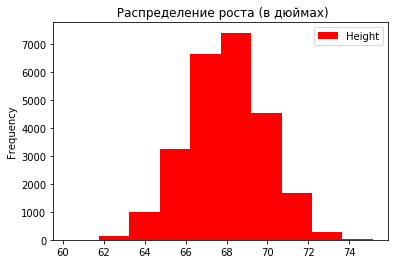

In [3]:
# Далее просмотрим распределение роста и веса

data.plot(y = 'Height', kind = 'hist', color = 'red', title = ' Распределение роста (в дюймах)')

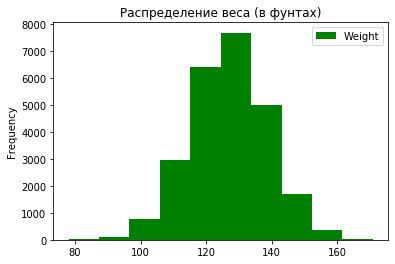

In [4]:
data.plot(y = 'Weight', kind = 'hist', color = 'green', title = 'Распределение веса (в фунтах)')

### Пункт 2. Вводим индекс массы тела

In [5]:
#используем метод из инструкции к работе и создаем новый признак - индекс массы тела
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

In [6]:
#вновь вызовем у датафрейма Data метод head(), чтобы посмотреть, как теперь выгядит датафрейм
data.head(5)

,Height,Weight,BMI
Index,,,
1,65.78331,112.9925,18.357573
2,71.51521,136.4873,18.762577
3,69.39874,153.0269,22.338895
4,68.21660,142.3354,21.504526
5,67.78781,144.2971,22.077581


### Пункт 3. Попарные зависимости признаков

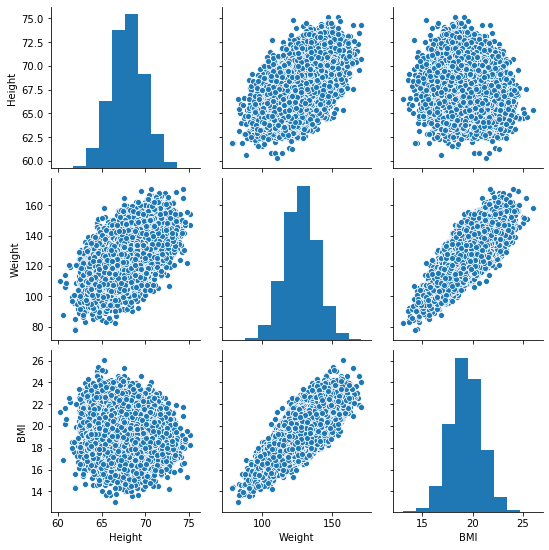

In [7]:
#попарные зависимости признаков
sns.pairplot(data)

### Пункт 4. Добавление в датафрейм весовой категории

In [8]:
#Метод, который определяет весовую категорию - параметр weight_cat датафрейма
def weight_category(weight):
    pass
    if (weight < 120):
        return 1  # если вес меньше 120 фунтов, присвоить первую категорию
    if (weight > 150):
        return 3  # если вес больше 150 фунтов, присвоить третью категорию
    else:
        return 2  # в остальных случаях, присвоить вторую категорию

In [9]:
#создаем новый столбец датафрейма data - 'weight_cat', значения которого получим посредством применения
#написанного нами выше метода к значению колонки 'Weight' в той же строке
data['weight_cat'] = data['Weight'].apply(weight_category)

In [10]:
#Посмотрим, как изменился датафрейм
data.head(10)

,Height,Weight,BMI,weight_cat
Index,,,,
1,65.78331,112.9925,18.357573,1
2,71.51521,136.4873,18.762577,2
3,69.39874,153.0269,22.338895,3
4,68.21660,142.3354,21.504526,2
5,67.78781,144.2971,22.077581,2
6,68.69784,123.3024,18.368870,2
7,69.80204,141.4947,20.417428,2
8,70.01472,136.4623,19.571813,2
9,67.90265,112.3723,17.134953,1


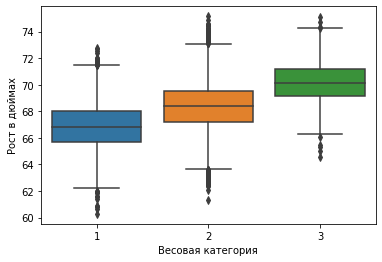

In [11]:
#Посмотрим на распредление роста по весовым категориям

sns.boxplot(y = data['Height'], x = data['weight_cat'])
plt.xlabel('Весовая категория')
plt.ylabel('Рост в дюймах')
plt.show()

Ожидаемо, подростки, обладающие большим весом, в среднем и более рослые 

### Пункт 5. Scatter plot зависимости роста от веса

Посмотрим на распределение объектов в координатах признаков(вес-рост)

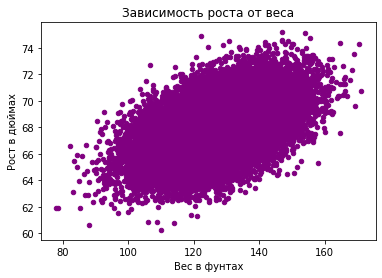

In [12]:
#Зависимость роста от веса, тип графика - точечный (scatter)
data.plot(x = 'Weight', y = 'Height', kind = 'scatter', color = 'purple', title = 'Зависимость роста от веса')
plt.xlabel('Вес в фунтах')
plt.ylabel('Рост в дюймах')
plt.show()

# Задание 2. Минимизация квадратичной ошибки

### Пункт 6. Квадратичная функция ошибки

In [13]:
#определяем функцию, которая находит значение квадратичной ошибки линейного приближения 
#зависимости роста от веса для данного нам набора данных
def appr_er(w):
#функция принимает на вход один аргумент - вектор размерности (1, 2), то есть состоящий из 
#коэффициентов w0 и w1
    x = data['Weight']
    y = data['Height']
    rng = len(data)
    sum_er = 0.
    for i in range(1, rng + 1):
        #находим ошибку для одной конкретной точки из набора данных
        cur_er = (y[i] - (w[0] + w[1]*x[i]))**2
        #суммируем ошибку по всем записям из набора данных
        sum_er = sum_er + cur_er
    return(sum_er)

### Пункт 7. Приближение зависимости прямой линией

Итак, мы решаем задачу: как через облако точек, соответсвующих наблюдениям в нашем наборе данных, 
в пространстве признаков "Рост" и "Вес" провести прямую линию так, чтобы минимизировать функционал из п. 6. Для начала давайте отобразим хоть какие-то прямые и убедимся, что они плохо передают зависимость роста от веса. Для примера, возьмём две прямые, соответствующие значениям параметров (w0,w1)=(60,0.05) и (w0,w1)=(50,0.16).

In [14]:
#Находим значение квадратичной ошибки для двух данных по условию задачи комбинаций w0 и w1
w_1 = (60, 0.05)
print('Значение квадратичной ошибки на всем наборе данных для первой пары коэффициентов: {}'.format(appr_er(w_1)))

Значение квадратичной ошибки на всем наборе данных для первой пары коэффициентов: 138197.37942816826


In [15]:
w_2 = (50, 0.16)
appr_er(w_2)
print('Значение квадратичной ошибки на всем наборе данных для второй пары коэффициентов: {}'.format(appr_er(w_2)))

Значение квадратичной ошибки на всем наборе данных для второй пары коэффициентов: 225065.2491128768


In [16]:
#Напишем функцию для вычисления приблизительного значения y (роста) по значению свободной переменной (w0)
#наклона прямой (w1) и весу (x)
#На вход функции подаем вектор коэффициентов и массив значений веса
def approx_y(w, x_weight):
    return (w[0] + w[1]*x_weight)

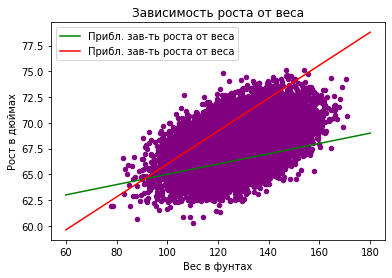

In [17]:
x = np.linspace(60, 180, 1000)

#Scatter plot зависимости роста от веса
data.plot(x = 'Weight', y = 'Height', kind = 'scatter', color = 'purple', title = 'Зависимость роста от веса')
#График функции приближения
# для w0 = 60, w1 = 0.05
plt.plot(x, approx_y(w_1, x), color = 'green', label = 'Прибл. зав-ть роста от веса')
#для w0 = 50, w1 = 0.16
plt.plot(x, approx_y(w_2, x), color = 'red', label = 'Прибл. зав-ть роста от веса')
plt.legend(loc = 'upper left')
plt.xlabel('Вес в фунтах')
plt.ylabel('Рост в дюймах')
plt.show()

### Пункт 8. Минимизация квадратичной функции ошибки

Минимизация квадратичной функции ошибки - относительная простая задача, поскольку функция выпуклая. Для такой задачи существует много методов оптимизации. Посмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.

In [18]:
#фиксируем свободный коэффициент
w0_fixed = 50
#Создаем массив значений наклона прямой 
w1_list = np.arange(0.01, 0.51, 0.01)

#Создаем массив значений функции квадратичной ошибки при различных значениях наклона прямой
er_w1_list = []
w0_fix_w1_var = [w0_fixed, w1_list[0]]
for i in range (50):
    w0_fix_w1_var[1] = w1_list[i]
    er_w1_list.append(appr_er(w0_fix_w1_var))

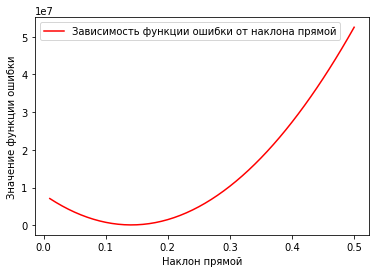

In [19]:
#График зависимости функции ошибки от наклона прямой 
plt.plot(w1_list, er_w1_list, color = 'red', label = 'Зависимость функции ошибки от наклона прямой')
#Подпись горизонтальной оси
plt.xlabel('Наклон прямой')
#Подпись вертикальной оси
plt.ylabel('Значение функции ошибки')
#вывод легенды
plt.legend()
plt.show()

### Пункт 9. Поиск оптимального наклона

Для того, чтобы найти отпимальный наклон прямой, которой мы описываем нащи данные, воспользуемся методом optimize из модуля scipy.optimize.

In [20]:
import scipy.optimize as sp

In [21]:
#вычисляем минимум зависимости функции квадратичной ошибки от наклона прямой
sp.minimize_scalar(lambda w1: appr_er([w0_fixed, w1]), bounds = (-5, 5), method = 'bounded')

     fun: 79512.21728699488
 message: 'Solution found.'
    nfev: 6
  status: 0
 success: True
       x: 0.1410920372883444

In [22]:
#выводим значение минимума зависимости функции ошибки от наклона прямой в отдельную переменную
w1_min = sp.minimize_scalar(lambda w1: appr_er([w0_fixed, w1]), 
                            bounds = (-5, 5), method = 'bounded').get('x')
print ('Оптимальное значение наклона прямой - параметра w1 - равно: {}'.format(w1_min))

Оптимальное значение наклона прямой - параметра w1 - равно: 0.1410920372883444


Теперь посмотрим, насколько хорошо приближает набор данных прямая с наклоном, найденным с помощью метода minimize.

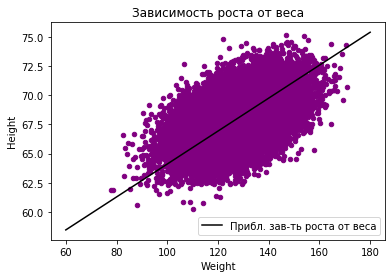

In [23]:
#Изобразим приближенную зависимость роста от веса при оптимальном значении наклона прямой 
#на одном графике со Scatter plot`ом 
data.plot(x = 'Weight', y = 'Height', kind = 'scatter', color = 'purple', 
                                          title = 'Зависимость роста от веса')
plt.plot(x, approx_y([w0_fixed, w1_min], x), color = 'black', label = 'Прибл. зав-ть роста от веса')
plt.legend()
plt.show()

Как видно, теперь прямая куда более точно описывает данные.

### Пункт 10. Трехмерный график зависиомти функции ошибки

In [24]:
from mpl_toolkits.mplot3d import Axes3D

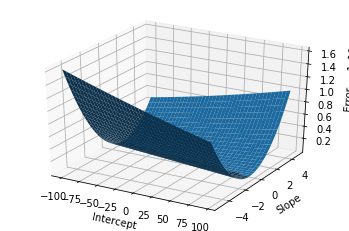

In [25]:
# Теперь повторим то же самое, но уже с нашей функцией и диапазоном значений весовых коэффициентов
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-100, 100, 5)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = appr_er([X, Y])

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

### Пункт 11. Подбор отпимальных параметров

In [26]:
# создаем кортеж, состоящий из двух кортежей, который будет использоваться методом minimize 
# в качестве границ, внутри которых мы ищем минимумы 
bnd = ((-100, 100), (-5, 5))
# задаем начальную точку
x0 = np.array([0, 0])
# выводим 
solution = sp.minimize(appr_er, x0, method = 'L-BFGS-B', bounds = bnd)

In [27]:
print(solution)

      fun: 67545.28708529084
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.04802132, -0.93132257])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 51
      nit: 12
   status: 0
  success: True
        x: array([57.57171454,  0.08200697])


In [28]:
# выводим минимальное значение функции ошибки
print ('Минимальное значение функции ошибки равно {}'.format(solution.get('fun')))

# выводим отпимальные значения весовых коэффициентов в отдельную переменную
weights_vector = solution.get('x')
# просмотрим получивщийся вектор весов
print('\nЗначения весов, при которых достигается минимальное значение функции ошибки:') 
print('w0 = {0}, w1 = {1}'.format(weights_vector[0], weights_vector[1]))

Минимальное значение функции ошибки равно 67545.28708529084

Значения весов, при которых достигается минимальное значение функции ошибки:
w0 = 57.57171454428976, w1 = 0.0820069703119935


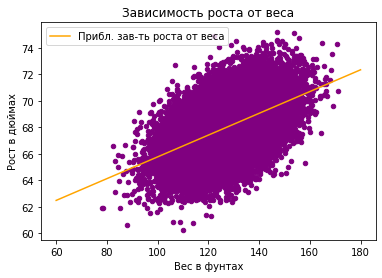

In [29]:
#Изобразим приближенную зависимость роста от веса при оптимальных значениях коэффициентов w0 и w1 
data.plot(x = 'Weight', y = 'Height', kind = 'scatter', color = 'purple', title = 'Зависимость роста от веса')
plt.plot(x, approx_y(weights_vector, x), color = 'orange', label = 'Прибл. зав-ть роста от веса')
plt.legend(loc = 'upper left')
plt.xlabel('Вес в фунтах')
plt.ylabel('Рост в дюймах')
plt.show()

Итак, с помощью методов модуля scipy нам удалось достичь достаточно точного приближения набора данных линейной зависимостью.